<a href="https://colab.research.google.com/github/Adithya-jh/01---JavaScript-Drum-Kit/blob/master/detectron_meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.1

     |████████████████████████████████| 274 kB 4.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=7c2db1a1e081712960a8d6db74b5a70b785d987a634882a7bfdcd3790408ceef
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
import torch
print(torch.cuda.is_available())

True


In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 549 kB/s 
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 130 kB 22.7 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 145 kB 47.9 MB/s 
     |████████████████████████████████| 749 kB 46.7 MB/s 
     |████████████████████████████████| 843 kB 42.3 MB/s 
     |████████████████████████████████| 112 kB 44.6 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211023-py3-none-any.whl size=60947 sha256=d6bef7208d7fc050351291734c25b4906a4f8bff292eedbe5726a094e49ea4a8
  Stored in directory: /root/.cache/pip/wheels/16/98/fc/252d62cab6263c719120e06b28f3378af59b52ce7a20e81852
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=0e4a00dcd211367ed8e6771ee9ab70628eb003e7154c404719a2844d250b87

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

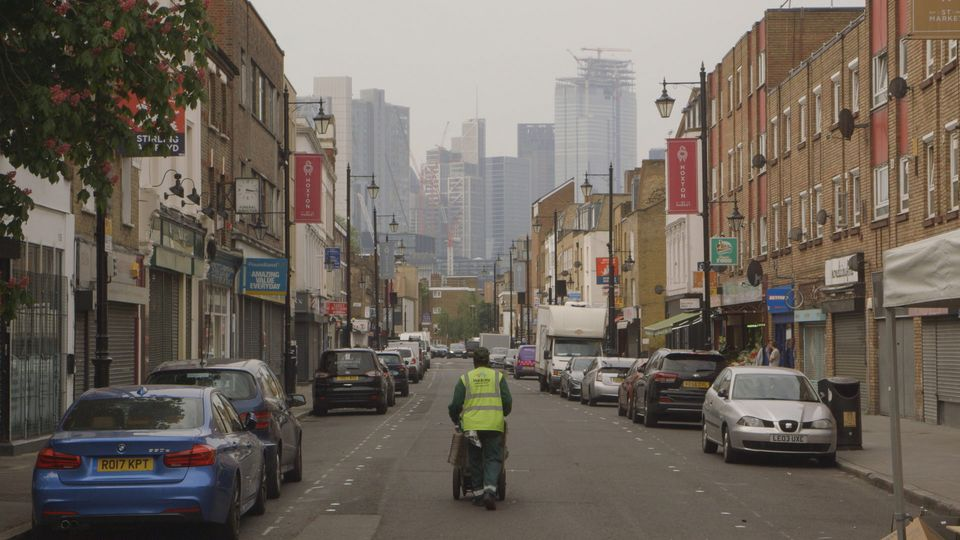

In [18]:
image = cv2.imread('./det3.jpeg')
cv2_imshow(image)

In [23]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml"))

In [24]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_1x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6

In [25]:
predictor = DefaultPredictor(cfg)
outputs=predictor(image)

model_final_b275ba.pkl: 167MB [00:17, 9.50MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


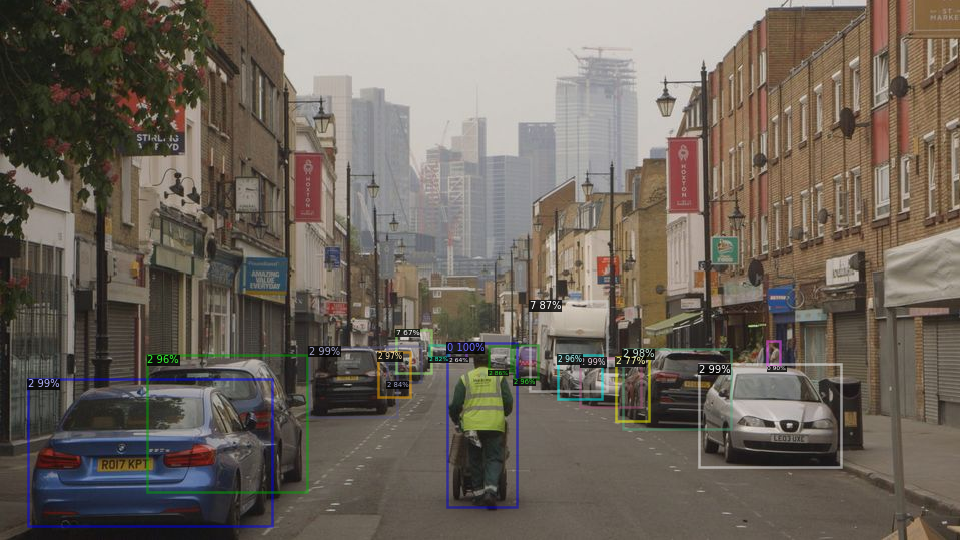

In [27]:
viz = Visualizer(image[:,:,::-1]),MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
output = viz[0].draw_instance_predictions(outputs['instances'].to('cpu'))
cv2_imshow(output.get_image()[:,:,::-1])